# 1. モデルのインポート

In [1]:
from hawkes import Model

# 2. シミュレーション

### 2.1. 指数カーネル: 1次元

In [2]:
# 指数関数カーネルモデルのシミュレーターを生成
exp_simulator = Model.build_simulator('exp')

# パラメータを指定
baselines = 0.1
adjacencies = 0.2
decays = 0.3
exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)

# シミュレーション時間を指定して、シミュレーションを実行
end_time = 1000
exp_simulation = exp_simulator(end_time=end_time)

In [3]:
# シミュレーションの結果の情報一覧を表示
exp_simulation.info()

- kernel_type: exp
- params: {'baselines': array([0.1]), 'adjacencies': array([[0.2]]), 'decays': array([[0.3]])}
- end_time: 1000
- events:
  - dim_1: [  8.58   9.9   45.68  45.69  47.44  69.65  82.96  95.69 139.7  172.31
 188.08 189.63 201.44 202.68 233.4  239.02 248.49 250.33 255.02 255.28
 307.48 314.77 326.25 332.09 337.73 340.97 341.19 365.74 386.34 398.9
 403.3  416.12 421.8  442.03 442.26 465.44 468.94 485.34 505.25 512.87
 519.47 525.7  528.38 531.2  539.7  547.41 553.89 583.03 593.52 598.83
 600.22 604.   619.56 619.72 619.98 640.25 641.57 654.69 663.05 669.74
 671.46 676.07 689.29 697.76 708.48 716.15 723.43 724.75 743.12 754.
 769.98 771.61 810.65 816.69 816.93 817.93 826.16 827.04 828.9  845.06
 845.25 848.39 849.89 857.94 862.23 862.6  867.48 868.57 869.   869.57
 869.8  871.51 871.52 872.98 880.41 884.11 886.32 916.99 922.98 927.19
 930.05 931.44 933.15 944.19 945.47 960.68 962.82 968.93 970.5  972.12
 972.25 973.9  976.55 980.76 989.65 999.4 ]


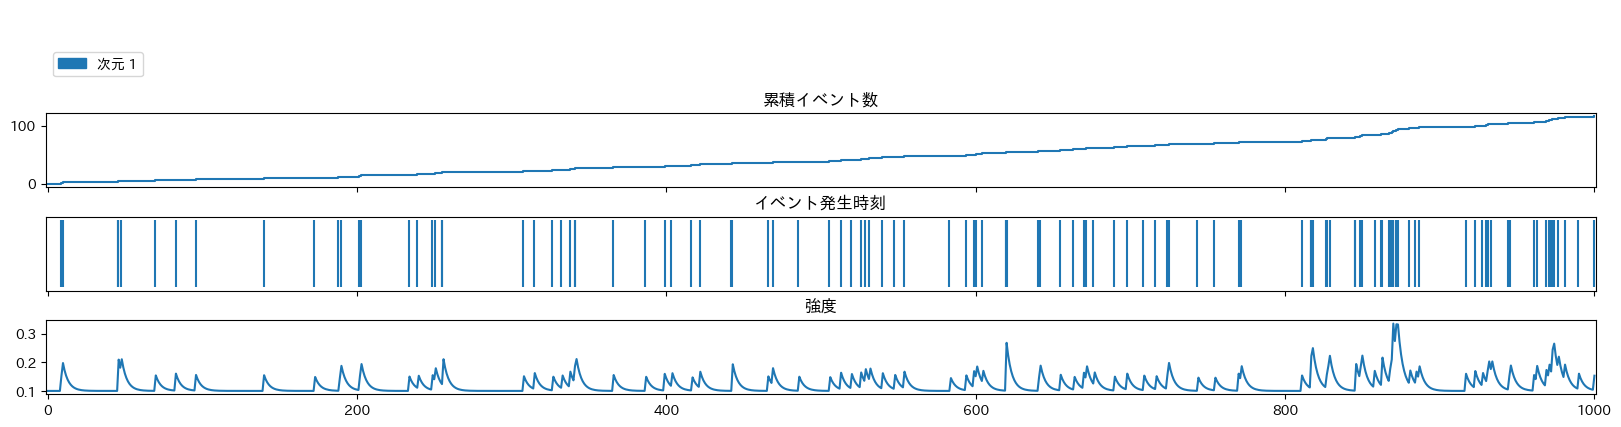

In [4]:
# シミュレーションの結果をプロット
exp_simulation.plot()

In [5]:
# シミュレーション結果の値の取得
print('✅ イベントの発生時刻:\n', exp_simulation.events)
print('✅ シミュレーション終了時刻:\n', exp_simulation.end_time)
print('✅ 条件付き強度関数:\n', exp_simulation.intensity)

✅ イベントの発生時刻:
 [  8.57551466   9.89685291  45.68358374  45.69457902  47.43817712
  69.65286921  82.96100247  95.68783191 139.70188734 172.30763955
 188.07695253 189.62706052 201.44252904 202.68074386 233.40362351
 239.01820188 248.48735789 250.32766086 255.01744434 255.28182404
 307.47585996 314.77462514 326.25184797 332.09335071 337.72533817
 340.97383606 341.18881777 365.7377759  386.33805083 398.90432738
 403.30052995 416.1199304  421.79949492 442.03053674 442.25667434
 465.43632743 468.93698644 485.33661301 505.2538091  512.86926016
 519.47400243 525.6951643  528.38315655 531.19745332 539.69930364
 547.40873526 553.88597579 583.02508007 593.52467471 598.82823192
 600.21701656 604.00253526 619.55891463 619.71516053 619.97848737
 640.25029546 641.5650415  654.68711192 663.05290484 669.7391946
 671.46234473 676.07118313 689.29082316 697.76148853 708.47706938
 716.15321407 723.42986879 724.7535746  743.11811788 754.00213656
 769.98482508 771.6103081  810.64660248 816.69179274 816.932609

### 2.2. 指数関数カーネル: 多次元

❗パラメータに関連する部分以外は1次元の場合と同様

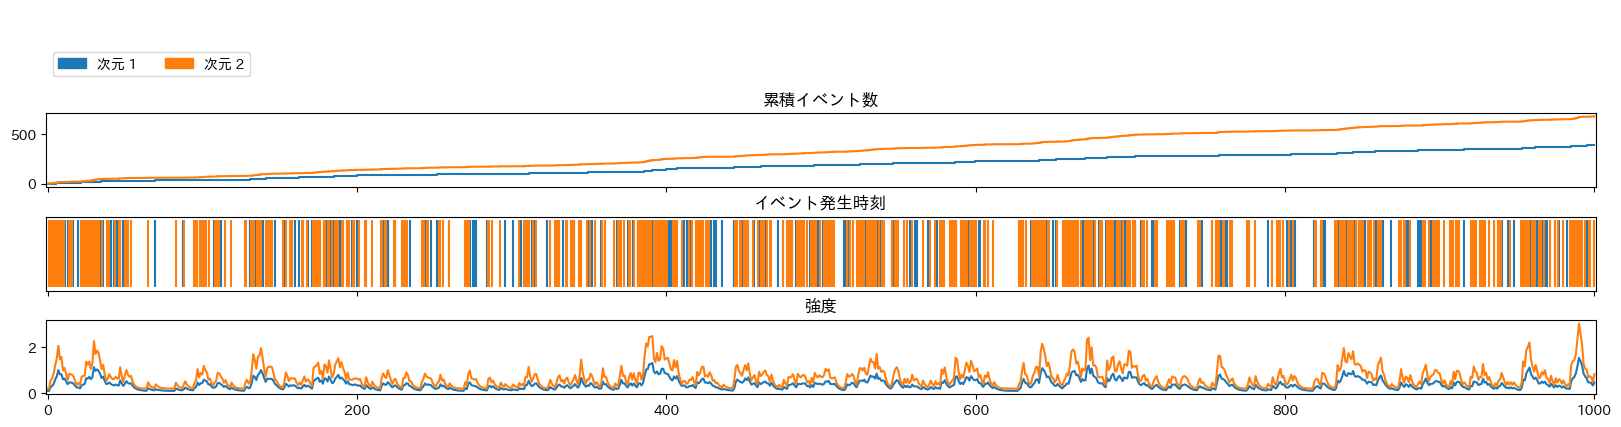

In [6]:
multi_exp_simulator = Model.build_simulator('exp')


# パラメータを指定 (baselines: n次元ベクトル, adjacencies: n×n行列, decays: n×n行列)
baselines = [0.1, 0.2]
adjacencies = [[0.2, 0.3],
               [0.4, 0.5]]
decays = [[0.3, 0.4],
          [0.5, 0.6]]
multi_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)

end_time = 1000
multi_exp_simulation = multi_exp_simulator(end_time=end_time)

multi_exp_simulation.plot()

### 2.3 べき分布カーネル: 1次元・多次元

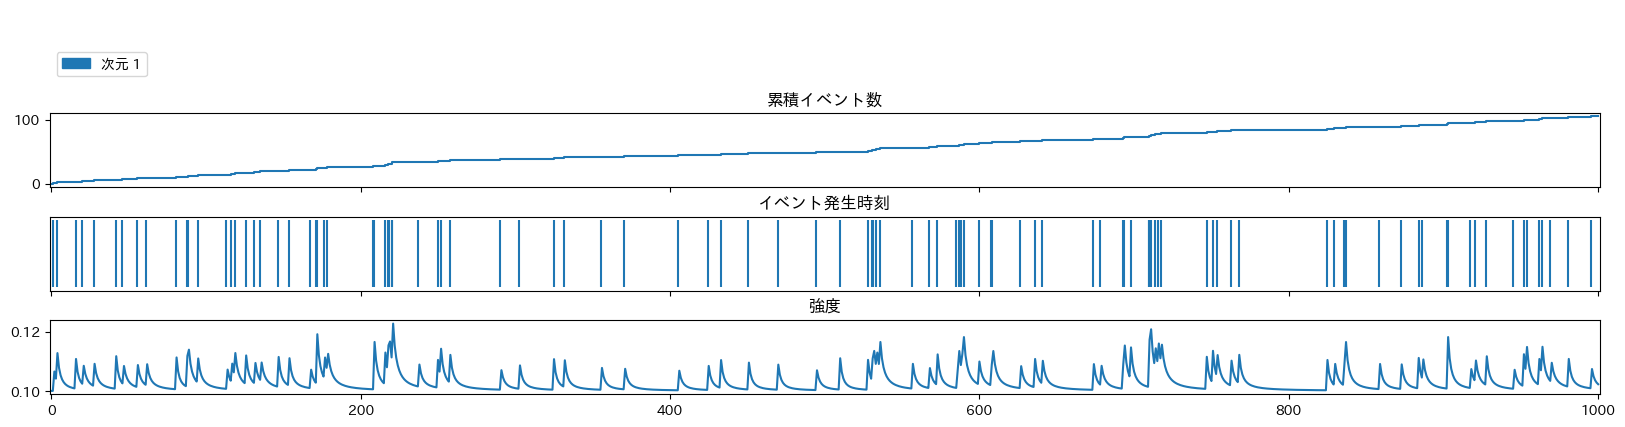

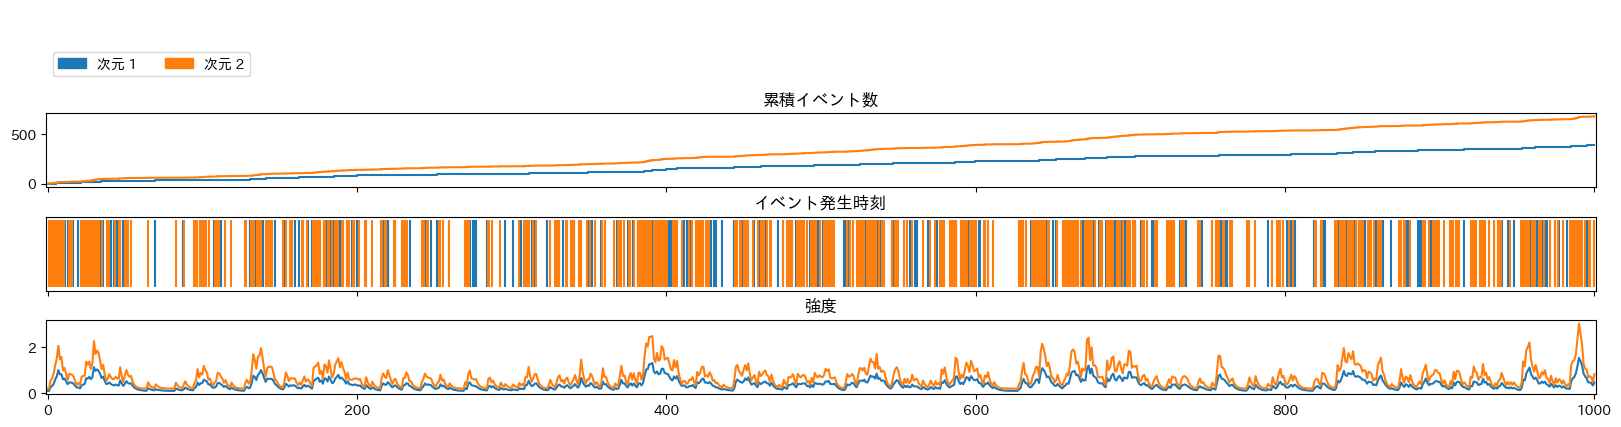

In [7]:
# べき分布カーネルモデルのシミュレーターを生成
pow_law_simulator = Model.build_simulator('pow_law')

# シミュレーション時間を指定
end_time = 1000

# パラメータを指定: 1次元
baselines = 0.1
multipliers = 0.1
exponents = 2
cutoffs = 3
pow_law_simulator.set_params(baselines=baselines, multipliers=multipliers, exponents=exponents, cutoffs=cutoffs)

pow_law_simulation = pow_law_simulator(end_time=end_time)
pow_law_simulation.plot()

# パラメータの指定: 多次元 (baselines: n次元ベクトル, multipliers: n×n行列, exponents: n×n行列, cutoffs: n×n行列)
baselines = [0.1, 0.1]
multipliers = [[0.1, 0.2],
               [0.2, 0.1]]
exponents = [[2, 3],
             [3, 2]]
cutoffs = [[3, 4],
           [4, 3]]
pow_law_simulator.set_params(baselines=baselines, multipliers=multipliers, exponents=exponents, cutoffs=cutoffs)

multi_pow_law_simulation = pow_law_simulator(end_time=end_time)
multi_exp_simulation.plot()

### 2.4 指数和カーネル: 1次元・多次元

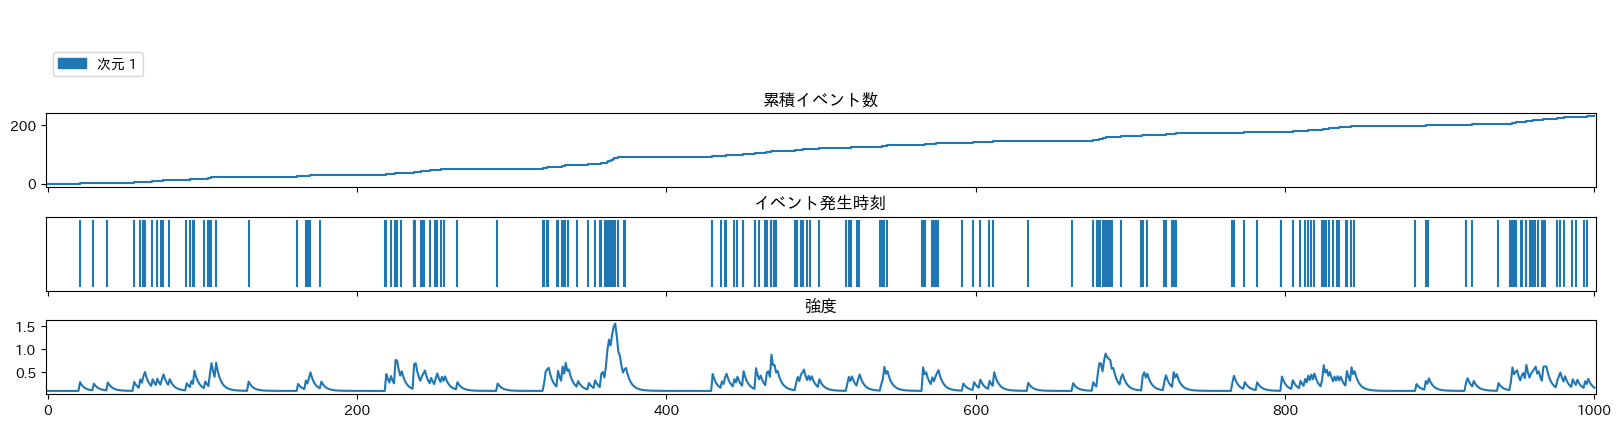

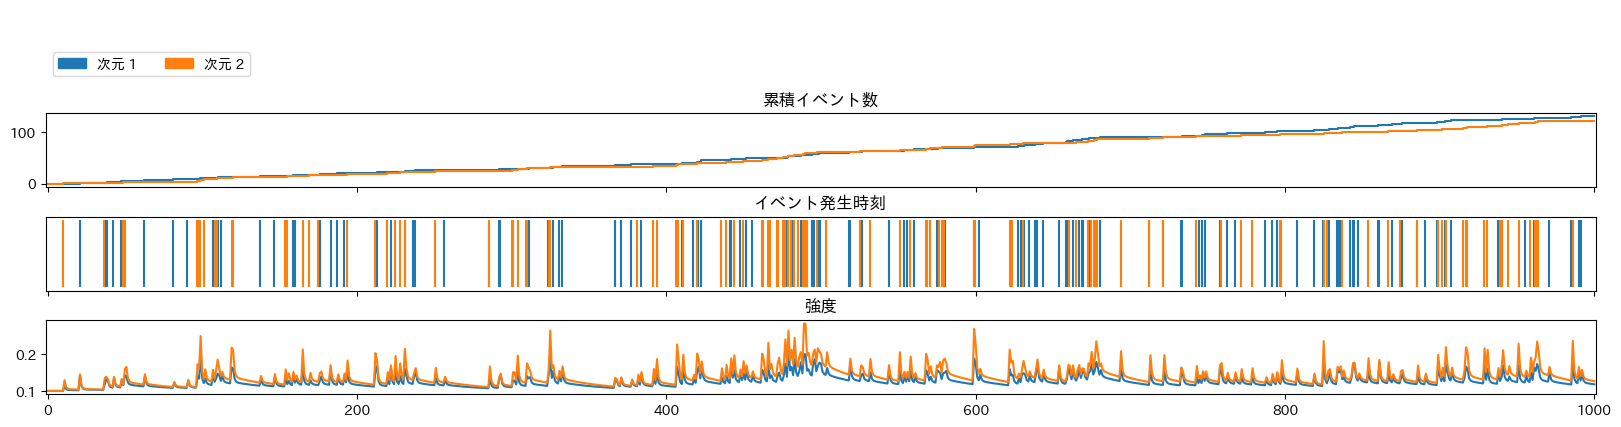

In [8]:
# 指数和カーネルモデルのシミュレーターを生成
sum_exp_simulator = Model.build_simulator('sum_exp')

# シミュレーション時間を指定
end_time = 1000

# イベントの次元をD, 指数関数の数をUとする. Uは2以上を想定.
# パラメータを指定: 1次元(本例ではD=1, U=3)
baselines = 0.1 # スカラー
adjacencies = [0.1, 0.2, 0.3] # U次元ベクトル
decays = [0.2, 0.3, 0.4] # U次元ベクトル

sum_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
sum_exp_simulation = sum_exp_simulator(end_time=end_time)
sum_exp_simulation.plot()

# パラメータの指定: 多次元(本例ではD=2, U=3)
baselines = [0.1, 0.1] # D次元ベクトル
adjacencies = [[[0.01, 0.01, 0.01], [0.02, 0.02, 0.02]],
               [[0.03, 0.03, 0.03], [0.04, 0.04, 0.04]]] # D×D×U行列
decays = [1, 1.5, 2], # U次元ベクトル

sum_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
multi_sum_exp_simulation = sum_exp_simulator(end_time=end_time)
multi_sum_exp_simulation.plot()

# 3. 推定

### 3.1.　指数カーネル: 1次元

- kernel_type: exp
- params: {'baselines': array([0.07834235]), 'adjacencies': array([[0.35380141]]), 'decays': array([[0.04924398]])}
- end_time: 1000
- loglik: -371.83868566399815
- events:
  - dim_1: [  3.98  29.85  39.18  44.88  45.67  63.35  71.39  73.35  82.75  96.3
 121.06 131.52 135.73 149.41 176.47 187.87 189.22 203.74 203.77 205.78
 208.73 211.54 212.94 214.82 228.92 231.01 231.2  234.52 237.88 243.18
 247.8  253.88 258.34 258.64 261.09 263.89 283.72 290.08 291.65 294.98
 295.02 296.94 297.71 299.24 305.66 306.06 308.01 310.62 323.45 326.84
 330.37 348.19 348.81 352.71 362.87 370.51 377.35 381.65 384.57 389.95
 429.32 443.5  449.93 455.7  460.1  462.88 467.2  469.09 469.56 471.27
 488.12 502.84 533.22 566.04 593.99 606.9  610.59 611.15 619.21 634.75
 636.85 639.25 650.02 682.14 689.05 693.76 701.62 712.71 721.16 723.67
 724.27 733.54 739.18 743.   783.53 784.93 797.77 801.25 803.07 809.96
 820.14 842.06 856.88 888.81 891.32 911.09 911.84 917.18 917.64 919.8
 923.05 941.73 952

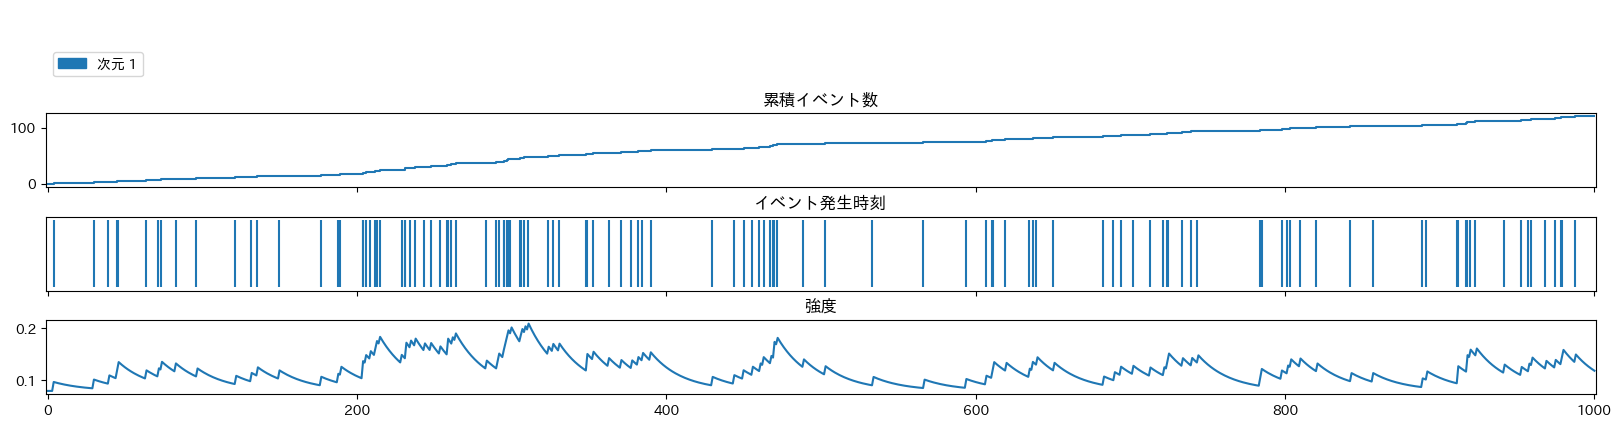

In [9]:
# -------テストデータ生成----------
exp_simulator = Model.build_simulator('exp')
baselines, adjacencies, decays, end_time = 0.1, 0.2, 0.3, 1000
exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
test_data = exp_simulator(end_time=end_time)
# ------------------------------

# 推定器の生成
exp_estimator = Model.build_estimator('exp')

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. L_BFGS_B法を使用する場合
l_bfgs_b_method = 'l_bfgs_b'
l_bfgs_b_option = {
    'init_params': {'baselines': 0.1, 'adjacencies': 0.1, 'decays': 0.1}, # 探索開始する初期値
    'bounds': {'baselines': (1e-5, None), 'adjacencies': (1e-5, None), 'decays': (1e-5, None)}, # 探索するパラメータの範囲
}

# 2. 勾配法を使用する場合
gradient_method = 'gradient'
gradient_option = {
    'init_params': {'baselines': 1, 'adjacencies': 1, 'decays': 1}, # 探索開始する初期値
    'max_iter': 100000, # 最大イテレーション数
    'learning_rate': 0.0001, # 学習率
    'tol': 0.01, # 勾配のノルムがこの値以下になったら探索を終了する
}

# 3. グリッドサーチを使用する場合
grid_search_method = 'grid_search'
grid_search_option = {
    'grid': {'baselines': slice(1e-5, 3, 0.1), 'adjacencies': slice(1e-5, 3, 0.1), 'decays': slice(1e-5, 3, 0.1)}, # 探索するグリッド
}

# 4. ランダムサーチを使用する場合
random_search_method = 'random_search'
random_search_option = {
    'n_iter': 100000, # 探索する回数
    'bounds': {'baselines': (1e-5, None), 'adjacencies': (1e-5, None), 'decays': (1e-5, None)}, # 探索するパラメータの範囲
}

# ------------------------------------------------------------👆
# ミニマイザーの設定値をセット (本例はL_BFGS_B法を使用)
exp_estimator.set_minimization_config(method=l_bfgs_b_method, option=l_bfgs_b_option)

# 推定
estimation_with_l_bfgs_b = exp_estimator(events=test_data.events, end_time=test_data.end_time)

# 結果
estimation_with_l_bfgs_b.info()
estimation_with_l_bfgs_b.plot()

### 3.2. 指数カネール: 多次元

❗パラメータに関連する部分以外は1次元の場合と同様

- kernel_type: exp
- params: {'baselines': array([0.07800809, 0.11861358]), 'adjacencies': array([[0.03228661, 0.43778499],
       [0.1063418 , 0.14447416]]), 'decays': array([[0.43997418, 0.08201133],
       [0.37158664, 0.74914799]])}
- end_time: 1000
- loglik: -866.5362698711747
- events:
  - dim_1: [  5.11   8.86  14.08  22.28  23.1   30.22  31.7   32.65  32.88  33.29
  36.49  54.88  72.08  79.31  83.7   85.48  87.58  98.5  101.67 110.35
 116.91 118.13 125.77 127.06 128.2  132.68 137.01 143.12 150.4  166.73
 168.02 169.01 176.77 187.44 190.91 192.46 204.98 211.68 234.4  243.61
 244.48 246.27 248.82 251.55 258.72 269.56 276.05 298.66 317.84 322.44
 341.79 347.25 359.92 368.13 385.77 389.75 391.38 392.62 404.68 411.53
 412.05 417.24 421.15 425.74 427.57 436.62 442.59 446.15 448.92 456.88
 460.41 462.66 466.35 467.31 470.86 476.77 478.26 479.54 493.79 494.55
 495.8  497.53 510.25 521.56 523.1  553.58 567.69 596.53 606.21 608.89
 609.84 611.53 619.76 621.33 625.1  637.4  638.22 640.63 

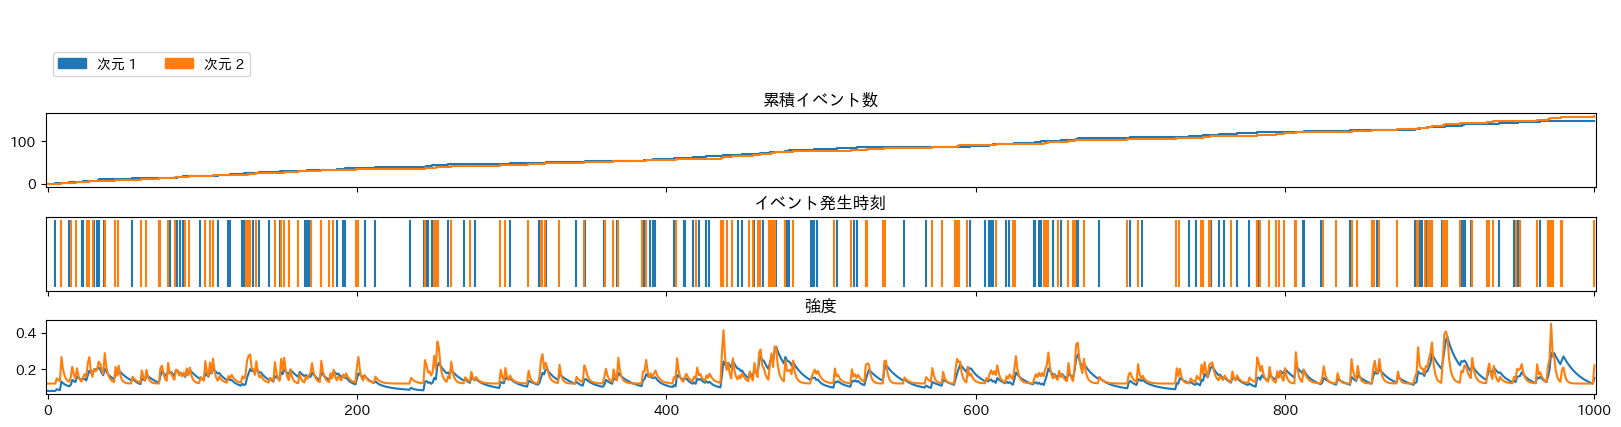

In [10]:
# -------テストデータ生成----------
exp_simulator = Model.build_simulator('exp')
baselines, adjacencies, decays, end_time = [0.1, 0.1], [[0.2, 0.2], [0.2, 0.2]], [[0.3, 0.3], [0.3, 0.3]], 1000
exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
test_data = exp_simulator(end_time=end_time)
# ------------------------------

# 推定器の生成
multi_exp_estimator = Model.build_estimator('exp')

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. L_BFGS_B法を使用する場合
l_bfgs_b_method = 'l_bfgs_b'
l_bfgs_b_option = {
    'init_params': { # ❗探索開始する初期値
        'baselines': [1, 1],
        'adjacencies': [[1, 1],
                        [1, 1]],
        'decays': [[1, 1],
                   [1, 1]]
    },
    'bounds': { # ❗探索するパラメータの範囲
        'baselines': [(1e-5, None), (1e-5, None)],
        'adjacencies': [[(1e-5, None), (1e-5, None)],
                        [(1e-5, None), (1e-5, None)]],
        'decays': [[(1e-5, None), (1e-5, None)],
                   [(1e-5, None), (1e-5, None)]]
    },
}

# ❗2. 勾配法は多次元に対応していない

# 3. グリッドサーチを使用する場合
grid_search_method = 'grid_search'
grid_search_option = {
    'grid': { # ❗探索するグリッド
        'baselines': [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
        'adjacencies': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
                        [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
        'decays': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
                   [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
    }
}

# 4. ランダムサーチを使用する場合
random_search_method = 'random_search'
random_search_option = {
    'n_iter': 100000, # 探索する回数
    'bounds': { # ❗探索するパラメータの範囲
        'baselines': [(1e-5, None), (1e-5, None)],
        'adjacencies': [[(1e-5, None), (1e-5, None)],
                        [(1e-5, None), (1e-5, None)]],
        'decays': [[(1e-5, None), (1e-5, None)],
                   [(1e-5, None), (1e-5, None)]]
    },
}
# ------------------------------------------------------------👆

# ミニマイザーの設定値をセット (本例はL-BFGS_B法を使用)
multi_exp_estimator.set_minimization_config(method=l_bfgs_b_method, option=l_bfgs_b_option)

# 推定
multi_estimation_with_l_bfgs_b = multi_exp_estimator(events=test_data.events, end_time=test_data.end_time)

# 結果
multi_estimation_with_l_bfgs_b.info()
multi_estimation_with_l_bfgs_b.plot()

### 3.3. べき分布カネール: 1次元・多次元

- 推定器の生成
- パラメータに関連する部分(init_params, bounds, grid)

以外は指数カーネルの場合(3.1, 3.2)と同様

##### 推定器の生成

In [11]:
pow_law_estimator = Model.build_estimator('pow_law')

##### ミニマイザーの設定値 （パラメーターに関連する部分）

In [12]:
# 1次元

# init_params: 探索開始する初期値
{'baselines': 1, 'multipliers': 1, 'exponents': 2, 'cutoffs': 2}
# bounds: 探索するパラメータの範囲
{'baselines': (1e-5, None), 'multipliers': (1e-5, None), 'exponents': (1+1e-5, None), 'cutoffs': (1+1e-5, None)}
# grid: 探索するグリッド
{'baselines': slice(1e-5, 3, 0.1), 'multipliers': slice(1e-5, 3, 0.1), 'exponents': slice(1+1e-5, 4, 0.1), 'cutoffs': slice(1+1e-5, 4, 0.1)}


# 多次元

# init_params: 探索開始する初期値
{
    'baselines': [1, 1],
    'multipliers': [[1, 1],
                    [1, 1]],
    'exponents': [[2, 2],
                  [2, 2]],
    'cutoffs': [[2, 2],
                [2, 2]]
}
# bounds: 探索するパラメータの範囲
{
    'baselines': [(1e-5, None), (1e-5, None)],
    'multipliers': [[(1e-5, None), (1e-5, None)],
                    [(1e-5, None), (1e-5, None)]],
    'exponents': [[(1+1e-5, None), (1+1e-5, None)],
                  [(1+1e-5, None), (1+1e-5, None)]],
    'cutoffs': [[(1+1e-5, None), (1+1e-5, None)],
                [(1+1e-5, None), (1+1e-5, None)]]
}
# grid: 探索するグリッド
{
    'baselines': [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
    'multipliers': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
                    [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
    'exponents': [[slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)],
                  [slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)]],
    'cutoffs': [[slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)],
                [slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)]]
}

{'baselines': [slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)],
 'multipliers': [[slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)],
  [slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)]],
 'exponents': [[slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)],
  [slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)]],
 'cutoffs': [[slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)],
  [slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)]]}

### 3.4. 指数和カーネル: １次元・多次元

- kernel_type: exp
- params: {'baselines': array([0.00561995, 0.14500786]), 'adjacencies': array([[0.02935634, 0.98706258],
       [0.01730977, 0.14936819]]), 'decays': array([[1.1934728 , 0.01739673],
       [1.15205902, 1.80732171]])}
- end_time: 1000
- loglik: -844.2630530607653
- events:
  - dim_1: [  3.27   8.01   8.26   8.87   9.24  40.05  85.64  87.27  95.6   96.36
 100.53 101.37 102.11 102.92 109.91 115.85 117.7  123.49 127.09 137.6
 163.05 164.87 166.59 168.22 169.08 170.14 170.54 179.17 182.93 184.2
 191.43 198.5  217.18 220.07 242.76 243.67 248.21 249.3  255.13 267.01
 282.58 284.04 293.76 309.97 334.89 336.69 346.93 347.07 353.75 355.29
 364.34 364.74 407.53 413.87 420.8  424.7  425.93 430.36 435.7  437.13
 446.91 447.61 451.01 461.2  469.67 477.45 478.66 483.4  493.21 495.84
 502.94 504.69 510.88 522.43 527.54 530.24 530.34 533.08 538.84 550.58
 551.2  556.9  563.73 565.82 574.57 576.48 583.92 598.77 606.34 606.56
 644.56 652.74 693.8  695.94 703.71 719.48 723.97 736.47 74

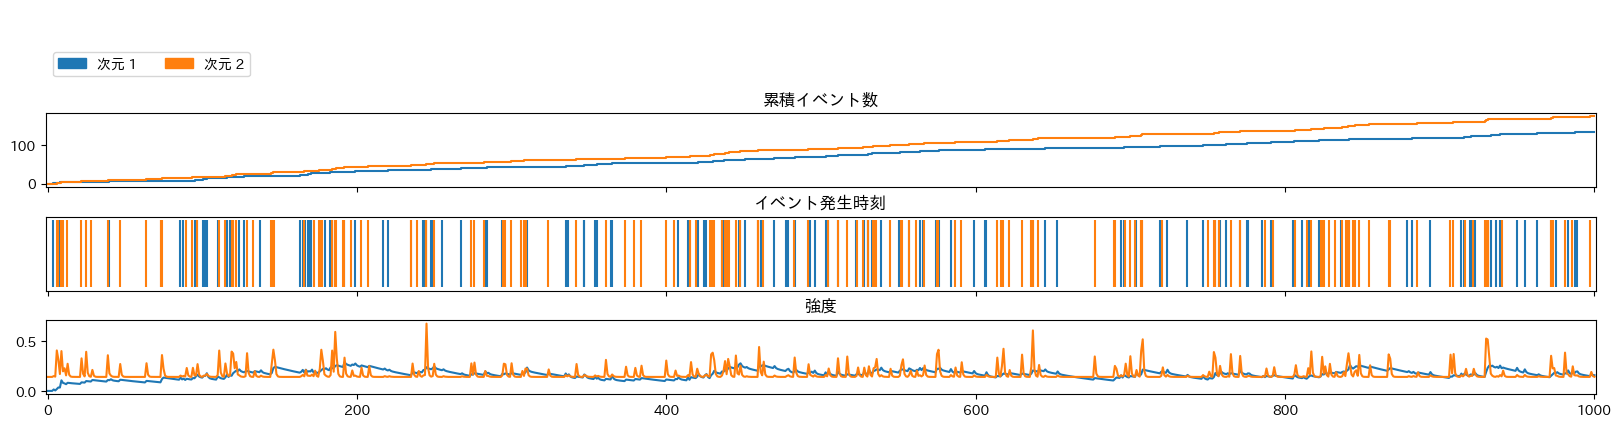

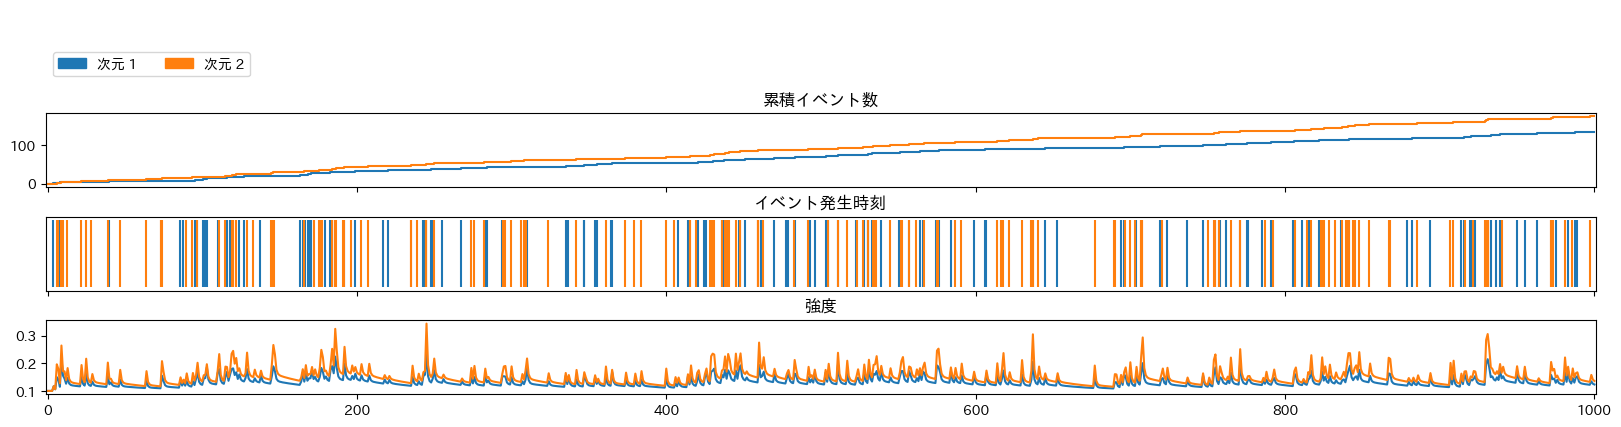

In [15]:
# -------テストデータ生成----------
sum_exp_simulator = Model.build_simulator('sum_exp')
end_time = 1000
baselines = [0.1, 0.1] # D次元ベクトル
adjacencies = [[[0.01, 0.01, 0.01], [0.02, 0.02, 0.02]],
               [[0.03, 0.03, 0.03], [0.04, 0.04, 0.04]]] # D×D×U行列
decays = [1, 1.5, 2], # U次元ベクトル
sum_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
test_data = sum_exp_simulator(end_time=end_time)
# ------------------------------

# 推定器の生成
sum_exp_estimator = Model.build_estimator('sum_exp')

# 指数関数の数(ハイパーパラメータ)を指定
sum_exp_estimator.set_num_exps(3)

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. L-BFGS-B法のみ対応
l_bfgs_b_method = 'l_bfgs_b'
l_bfgs_b_option = {
    'init_params': { # ❗探索開始する初期値
        'baselines': [1, 1],
        'adjacencies': [[[1, 1, 1], [1, 1, 1]],
                        [[1, 1, 1], [1, 1, 1]]],
        'decays': [1, 1, 1]
    },
    'bounds': { # ❗探索するパラメータの範囲
        'baselines': [(1e-5, None), (1e-5, None)],
        'adjacencies': [[[(1e-5, None), (1e-5, None), (1e-5, None)], [(1e-5, None), (1e-5, None), (1e-5, None)]],
                        [[(1e-5, None), (1e-5, None), (1e-5, None)], [(1e-5, None), (1e-5, None), (1e-5, None)]]],
        'decays': [(1e-5, None), (1e-5, None), (1e-5, None)]
    },
}
# ------------------------------------------------------------👆

# ミニマイザーの設定値をセット
sum_exp_estimator.set_minimization_config(method=l_bfgs_b_method, option=l_bfgs_b_option)

# 推定
sum_exp_estimation = multi_exp_estimator(events=test_data.events, end_time=test_data.end_time)

# 結果
sum_exp_estimation.info()
sum_exp_estimation.plot()
test_data.plot()